In [1]:
import math
from math import pi

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from astropy.io import ascii

In [5]:
infile = 'lens1_data.txt'
data1 = ascii.read(infile, names=['day', 'fla', 'flb', 'flc'
                                  , 'fld', 'cerra', 'cerrb', 'cerrc', 'cerrd'])

In [6]:
data1

day,fla,flb,flc,fld,cerra,cerrb,cerrc,cerrd
float64,float64,float64,float64,float64,float64,float64,float64,float64
367.46,34.87,16.13,17.659,5.852,0.22896,0.13422,0.14098,0.09941
369.4,33.539,16.401,17.414,5.828,0.24288,0.16787,0.1715,0.14042
372.63,34.246,16.338,16.742,5.702,0.21943,0.12465,0.12657,0.08426
375.48,34.052,16.535,17.394,5.762,0.22167,0.1313,0.13523,0.09269
380.45,33.742,17.01,17.158,5.898,0.26565,0.2,0.20046,0.1756
385.65,33.208,17.122,17.035,5.672,0.29313,0.23828,0.23806,0.21768
388.54,34.322,16.912,16.904,5.962,0.233,0.14892,0.14889,0.11472
389.48,33.66,17.018,17.167,6.093,0.24073,0.16609,0.16664,0.13601
391.45,34.804,17.343,17.374,5.85,0.29403,0.23168,0.23177,0.20995


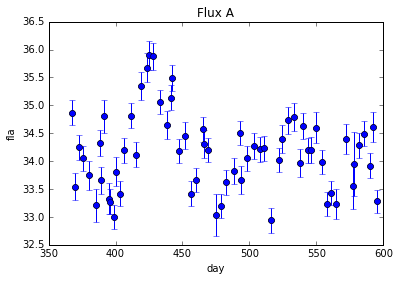

In [7]:
day = data1["day"]
fla = data1["fla"]
cerra = data1["cerra"]
plt.plot(day, fla, "bo")
plt.xlabel("day")
plt.ylabel("fla")
plt.errorbar(day, fla, yerr = cerra, fmt = "bo")
plt.title("Flux A")

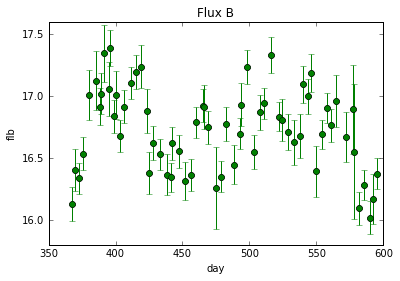

In [8]:
flb = data1["flb"]
cerrb = data1["cerrb"]
plt.plot(day, flb, "go")
plt.xlabel("day")
plt.ylabel("flb")
plt.errorbar(day, flb, yerr = cerrb, fmt = "go")
plt.title("Flux B")

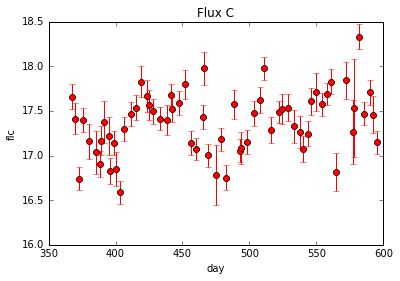

In [9]:
flc = data1["flc"]
cerrc = data1["cerrc"]
plt.plot(day, flc, "ro")
plt.xlabel("day")
plt.ylabel("flc")
plt.errorbar(day, flc, yerr = cerrc, fmt = "ro")
plt.title("Flux C")

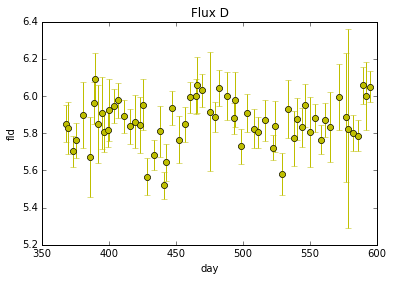

In [10]:
fld = data1["fld"]
cerrd = data1["cerrd"]
plt.plot(day, fld, "yo")
plt.xlabel("day")
plt.ylabel("fld")
plt.errorbar(day, fld, yerr = cerrd, fmt = "yo")
plt.title("Flux D")

In [55]:
flaNorm = fla/fla.mean()
flbNorm = flb/flb.mean() + 0.18
flcNorm = flc/flc.mean() + 0.36
fldNorm = fld/fld.mean() + 0.54
cerraNorm = cerra/fla.mean()
cerrbNorm = cerrb/flb.mean()
cerrcNorm = cerrc/flc.mean()
cerrdNorm = cerrd/fld.mean()

In [56]:
slopea = np.polyfit(day, flaNorm, 15)
slopeb = np.polyfit(day, flbNorm, 15)
slopec = np.polyfit(day, flcNorm, 15)
sloped = np.polyfit(day, fldNorm, 15)
linea = np.polyval(slopea, day)
lineb = np.polyval(slopeb, day)
linec = np.polyval(slopec, day)
lined = np.polyval(sloped, day)

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Fluxes of all images, but with vertical shift so all could be seen on same graph


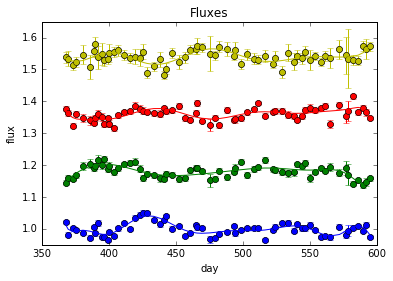

In [58]:
plt.plot(day, flaNorm, "bo")
plt.errorbar(day, flaNorm, yerr = cerraNorm, fmt = "bo")
plt.plot(day, linea, "b")

plt.plot(day, flbNorm, "go")
plt.errorbar(day, flbNorm, yerr = cerrbNorm, fmt = "go")
plt.plot(day, lineb, "g")

plt.plot(day, flcNorm, "ro")
plt.errorbar(day, flcNorm, yerr = cerrcNorm, fmt = "ro")
plt.plot(day, linec, "r")

plt.plot(day, fldNorm, "yo")
plt.errorbar(day, fldNorm, yerr = cerrdNorm, fmt = "yo")
plt.plot(day, lined, "y")

plt.xlabel("day")
plt.ylabel("flux")
plt.ylim([0.95, 1.65])
plt.title("Fluxes")
print("Fluxes of all images, but with vertical shift so all could be seen on same graph")

All graphs in subplots, helps distinguish graphs more clearly to find common peak among graphs


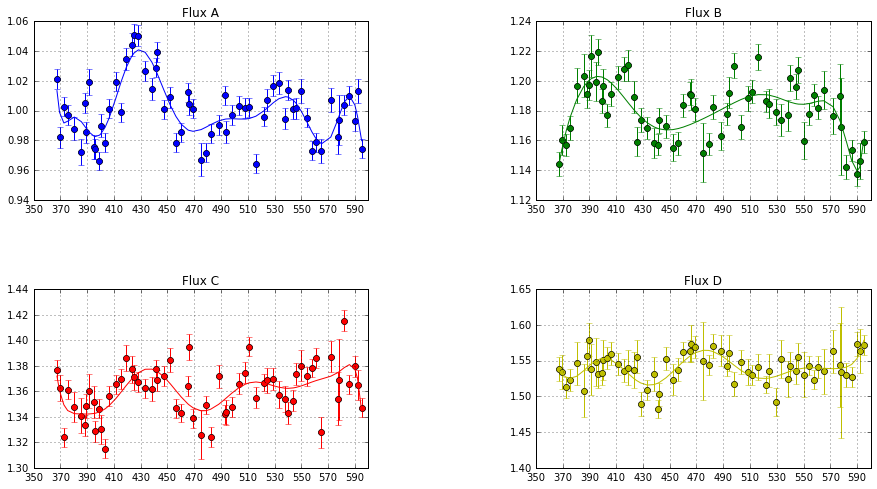

In [59]:
plt.subplots(2, 2, sharex='col', sharey='row', figsize = (15, 8))
plt.xlabel("day")
plt.ylabel("flux")
plt.ylim([0.95, 1.65])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

plt.subplot(2, 2, 1).grid()
plt.plot(day, flaNorm, "bo")
plt.errorbar(day, flaNorm, yerr = cerraNorm, fmt = "bo")
plt.plot(day, linea, "b")
plt.title("Flux A")
plt.subplot(2, 2, 1).set_xticks(np.arange(350, 600, 20))

plt.subplot(2, 2, 2).grid()
plt.subplot(2, 2, 2).set_xlim(350, 600)
plt.plot(day, flbNorm, "go")
plt.errorbar(day, flbNorm, yerr = cerrbNorm, fmt = "go")
plt.plot(day, lineb, "g")
plt.title("Flux B")
plt.subplot(2, 2, 2).set_xticks(np.arange(350, 600, 20))

plt.subplot(2, 2, 3).grid()
plt.subplot(2, 2, 3).set_xlim(350, 600)
plt.plot(day, flcNorm, "ro")
plt.errorbar(day, flcNorm, yerr = cerrcNorm, fmt = "ro")
plt.plot(day, linec, "r")
plt.title("Flux C")
plt.subplot(2, 2, 3).set_xticks(np.arange(350, 600, 20))

plt.subplot(2, 2, 4).grid()
plt.subplot(2, 2, 4).set_xlim(350, 600)
plt.plot(day, fldNorm, "yo")
plt.errorbar(day, fldNorm, yerr = cerrdNorm, fmt = "yo")
plt.plot(day, lined, "y")
plt.title("Flux D")
plt.subplot(2, 2, 4).set_xticks(np.arange(350, 600, 20))

print("All graphs in subplots, helps distinguish graphs more clearly to find common peak among graphs")

Graphs shifted in respect to blue graph to align a common peak to the same day


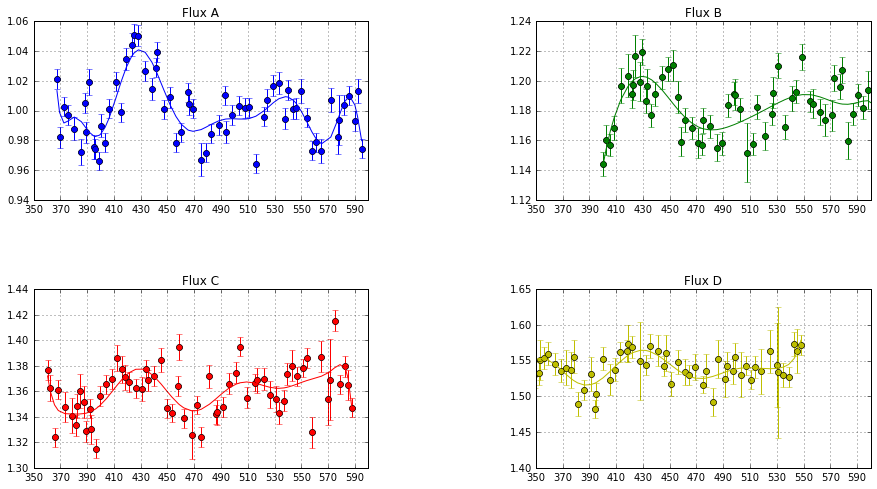

In [60]:
plt.subplots(2, 2, sharex='col', sharey='row', figsize = (15, 8))
plt.xlabel("day")
plt.ylabel("flux")
plt.ylim([0.95, 1.65])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

dayA = day
plt.subplot(2, 2, 1).grid()
plt.plot(dayA, flaNorm, "bo")
plt.errorbar(dayA, flaNorm, yerr = cerraNorm, fmt = "bo")
plt.plot(dayA, linea, "b")
plt.title("Flux A")
plt.subplot(2, 2, 1).set_xticks(np.arange(350, 600, 20))

dayB = day + 33
plt.subplot(2, 2, 2).grid()
plt.subplot(2, 2, 2).set_xlim(350, 600)
plt.plot(dayB, flbNorm, "go")
plt.errorbar(dayB, flbNorm, yerr = cerrbNorm, fmt = "go")
plt.plot(dayB, lineb, "g")
plt.title("Flux B")
plt.subplot(2, 2, 2).set_xticks(np.arange(350, 600, 20))

dayC = day - 7
plt.subplot(2, 2, 3).grid()
plt.subplot(2, 2, 3).set_xlim(350, 600)
plt.plot(dayC, flcNorm, "ro")
plt.errorbar(dayC, flcNorm, yerr = cerrcNorm, fmt = "ro")
plt.plot(dayC, linec, "r")
plt.title("Flux C")
plt.subplot(2, 2, 3).set_xticks(np.arange(350, 600, 20))

dayD = day - 47
plt.subplot(2, 2, 4).grid()
plt.subplot(2, 2, 4).set_xlim(350, 600)
plt.plot(dayD, fldNorm, "yo")
plt.errorbar(dayD, fldNorm, yerr = cerrdNorm, fmt = "yo")
plt.plot(dayD, lined, "y")
plt.title("Flux D")
plt.subplot(2, 2, 4).set_xticks(np.arange(350, 600, 20))

print("Graphs shifted in respect to blue graph to align a common peak to the same day")

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Graphs shifted and stretched vertically and placed on the same plot with time shift


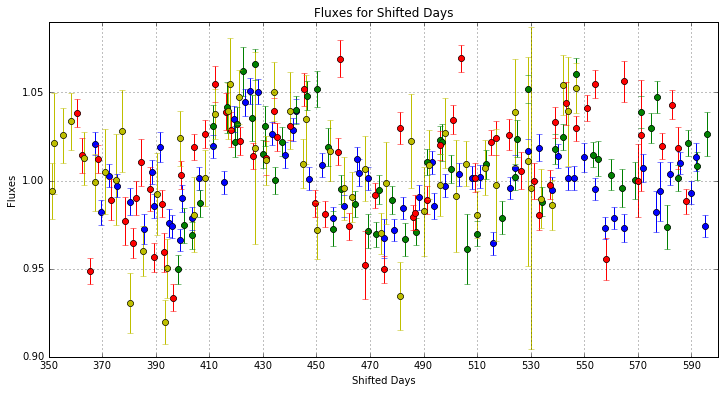

In [61]:
flaNormOver = fla/fla.mean()
flbNormOver = flb/flb.mean() * 1.55 - 0.545
flcNormOver = flc/flc.mean() * 1.7 - 0.69
fldNormOver = fld/fld.mean() * 1.47 - 0.465

slopeaOver = np.polyfit(day, flaNormOver, 15)
slopebOver = np.polyfit(day, flbNormOver, 15)
slopecOver = np.polyfit(day, flcNormOver, 15)
slopedOver = np.polyfit(day, fldNormOver, 15)
lineaOver = np.polyval(slopeaOver, day)
linebOver = np.polyval(slopebOver, day)
linecOver = np.polyval(slopecOver, day)
linedOver = np.polyval(slopedOver, day)

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(350, 600)
plt.xlabel("Shifted Days")
plt.ylabel("Fluxes")
plt.ylim([0.90, 1.09])
plt.xticks(np.arange(350, 600, 20))
plt.title("Fluxes for Shifted Days")

dayA = day
plt.plot(dayA, flaNormOver, "bo")
plt.errorbar(dayA, flaNormOver, yerr = cerraNorm, fmt = "bo")
#plt.plot(dayA, lineaOver, "b")

dayB = day + 31
plt.plot(dayB, flbNormOver, "go")
plt.errorbar(dayB, flbNormOver, yerr = cerrbNorm, fmt = "go")
#plt.plot(dayB, linebOver, "g")

dayC = day - 7
plt.plot(dayC, flcNormOver, "ro")
plt.errorbar(dayC, flcNormOver, yerr = cerrcNorm, fmt = "ro")
#plt.plot(dayC, linecOver, "r")

dayD = day - 48
plt.plot(dayD, fldNormOver, "yo")
plt.errorbar(dayD, fldNormOver, yerr = cerrdNorm, fmt = "yo")
#plt.plot(dayD, linedOver, "y")

#STRETCH GRAPHS (MULTIPLY EACH ONE BY LIKE 1.09 ISH OR SOMETHING LIKE THAT IN ORDER TO GET MORE PRECISE
#MEASURMENTS AND SHIFT A LITTLE LEFT AND RIGHT TO DO SO)
#NOTE TO SELF: TRY DOING IT WITH JUST THE CURVES

print("Graphs shifted and stretched vertically and placed on the same plot with time shift")

In [17]:
data1

day,fla,flb,flc,fld,cerra,cerrb,cerrc,cerrd
float64,float64,float64,float64,float64,float64,float64,float64,float64
367.46,34.87,16.13,17.659,5.852,0.22896,0.13422,0.14098,0.09941
369.4,33.539,16.401,17.414,5.828,0.24288,0.16787,0.1715,0.14042
372.63,34.246,16.338,16.742,5.702,0.21943,0.12465,0.12657,0.08426
375.48,34.052,16.535,17.394,5.762,0.22167,0.1313,0.13523,0.09269
380.45,33.742,17.01,17.158,5.898,0.26565,0.2,0.20046,0.1756
385.65,33.208,17.122,17.035,5.672,0.29313,0.23828,0.23806,0.21768
388.54,34.322,16.912,16.904,5.962,0.233,0.14892,0.14889,0.11472
389.48,33.66,17.018,17.167,6.093,0.24073,0.16609,0.16664,0.13601
391.45,34.804,17.343,17.374,5.85,0.29403,0.23168,0.23177,0.20995


In [62]:
length = len(day)
lastDay = day[length - 1]
firstDay = day[0]

averageDay = (lastDay - firstDay)/length

In [63]:
print("create 2-D array to keep work organized, will hold average day intervals along with corresponding average flux at that day")
dayLoop = firstDay
arrDays = []
#print(len(arrDays))
#counter1 = 1
while(dayLoop < lastDay - averageDay):
    arrDays.append(dayLoop)
    dayLoop += averageDay
    #print(counter1)
    #counter1 += 1
#print(len(arrDays))
avgDays = np.array([arrDays, np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays))])
print(avgDays)

create 2-D array to keep work organized, will hold average day intervals along with corresponding average flux at that day
[[ 367.46   371.015  374.57   378.125  381.68   385.235  388.79   392.345
   395.9    399.455  403.01   406.565  410.12   413.675  417.23   420.785
   424.34   427.895  431.45   435.005  438.56   442.115  445.67   449.225
   452.78   456.335  459.89   463.445  467.     470.555  474.11   477.665
   481.22   484.775  488.33   491.885  495.44   498.995  502.55   506.105
   509.66   513.215  516.77   520.325  523.88   527.435  530.99   534.545
   538.1    541.655  545.21   548.765  552.32   555.875  559.43   562.985
   566.54   570.095  573.65   577.205  580.76   584.315  587.87   591.425]
 [   0.       1.       2.       3.       4.       5.       6.       7.
     8.       9.      10.      11.      12.      13.      14.      15.
    16.      17.      18.      19.      20.      21.      22.      23.
    24.      25.      26.      27.      28.      29.      30.      31.


In [20]:
print("Calculated average flux at each average day by going average day ")
#start at 0
#have a value temp, this will be the day you are at in the first row of avgDays
#subtract 3 to temp, add 3 from temp, save these values as first and second
#nest another loop that goes through all the points in the original array
#locate the days that are in the range of first and second, and average the corresponding values
#save this value in the second row at the corresponding temp location
#no need to worry about index out of bounds, since the range of avgDays is the same range as the original array

#print avgDays[0]

flaNorm = fla/fla.mean()
flbNorm = flb/flb.mean()
flcNorm = flc/flc.mean()
fldNorm = fld/fld.mean()

#origDay = temp for old data table (day)
#newDay = temp for new data table (avgDays)

indexNewDay = 0
#print (len(avgDays[0]))
while(indexNewDay < len(avgDays[0])): #loop through first row of data table with average days
    currentNewDay = avgDays[0][indexNewDay] #averageday
    before = currentNewDay - averageDay
    after = currentNewDay + averageDay
    total1 = 0.0
    total2 = 0.0
    total3 = 0.0
    total4 = 0.0
    counter = 0.0
    indexOrigDay = 0
    while(indexOrigDay < len(day)): #loop through original days
        currentOrigDay = day[indexOrigDay]
        if(currentOrigDay >= before and currentOrigDay <= after): #loop through the original days, look for the days that are between before and after
            total1 += flaNormOver[indexOrigDay]
            total2 += flbNormOver[indexOrigDay]
            total3 += flcNormOver[indexOrigDay]
            total4 += fldNormOver[indexOrigDay]
            counter += 1
        indexOrigDay += 1
    #print("indexNewDay = " + str(indexNewDay) + " " + "before = " + str(before) + " " + "after = " + str(after) + " " + "indexOrigDay = " + str(indexOrigDay) + " " + "currentNewDay = " + str(currentNewDay) + " " + "currentOrigDay = " + str(currentOrigDay) + " ")
    average1 = total1/counter
    average2 = total2/counter
    average3 = total3/counter
    average4 = total4/counter
    avgDays[1][indexNewDay] = average1
    avgDays[2][indexNewDay] = average2
    avgDays[3][indexNewDay] = average3
    avgDays[4][indexNewDay] = average4
    #print("average " + str(average) + " total " + str(total) + " counter " + str(counter))
    indexNewDay += 1
    
print(avgDays)
"""
print day
total = 0.;
counter = 0.;
for newDay in avgDays[0]:
    first = newDay - averageDay;
    second = newDay + averageDay;
    for origDay in day:
        index = day.index(origDay)
        if((first > avgDays[0][0] and origDay >= first) and (second < avgDays[0][len(avgDays)] and origDay <= second)):
            total += flaNorm[index]
            counter+=1;
        if(counter == 0):
            total = flaNorm[index]
            counter = 1
        index2 = avgDays[0].index(newDay)
        avgDays[1][index2] = total/counter
"""
        
#it is not working because I am trying to access a row in a column, not a column in a row -> does not follow
#traditional route

[[ 367.46        371.015       374.57        378.125       381.68        385.235
   388.79        392.345       395.9         399.455       403.01        406.565
   410.12        413.675       417.23        420.785       424.34        427.895
   431.45        435.005       438.56        442.115       445.67        449.225
   452.78        456.335       459.89        463.445       467.          470.555
   474.11        477.665       481.22        484.775       488.33        491.885
   495.44        498.995       502.55        506.105       509.66        513.215
   516.77        520.325       523.88        527.435       530.99        534.545
   538.1         541.655       545.21        548.765       552.32        555.875
   559.43        562.985       566.54        570.095       573.65        577.205
   580.76        584.315       587.87        591.425     ]
 [   1.0015597     1.00196476    0.99993457    0.99255563    0.988017
     0.98869047    0.99552771    0.99353168    0.97205857    

'\nprint day\ntotal = 0.;\ncounter = 0.;\nfor newDay in avgDays[0]:\n    first = newDay - averageDay;\n    second = newDay + averageDay;\n    for origDay in day:\n        index = day.index(origDay)\n        if((first > avgDays[0][0] and origDay >= first) and (second < avgDays[0][len(avgDays)] and origDay <= second)):\n            total += flaNorm[index]\n            counter+=1;\n        if(counter == 0):\n            total = flaNorm[index]\n            counter = 1\n        index2 = avgDays[0].index(newDay)\n        avgDays[1][index2] = total/counter\n'

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<Container object of 3 artists>

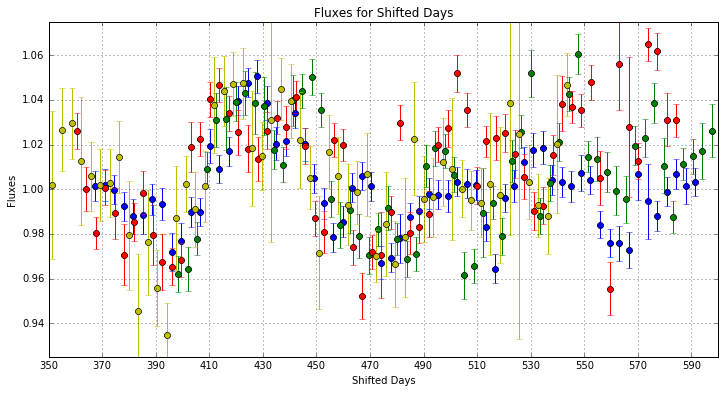

In [52]:
slopeaOver = np.polyfit(avgDays[0], avgDays[1], 15)
slopebOver = np.polyfit(avgDays[0], avgDays[2], 15)
slopecOver = np.polyfit(avgDays[0], avgDays[3], 15)
slopedOver = np.polyfit(avgDays[0], avgDays[4], 15)
lineaOver = np.polyval(slopeaOver, avgDays[0])
linebOver = np.polyval(slopebOver, avgDays[0])
linecOver = np.polyval(slopecOver, avgDays[0])
linedOver = np.polyval(slopedOver, avgDays[0])

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(350, 600)
plt.xlabel("Shifted Days")
plt.ylabel("Fluxes")
plt.ylim([0.925, 1.075])
plt.xticks(np.arange(350, 600, 20))
plt.title("Fluxes for Shifted Days")

avgDaysA = avgDays[0]
avgDaysB = avgDays[0] + 31
avgDaysC = avgDays[0] - 7
avgDaysD = avgDays[0] - 48

plt.plot(avgDaysA, avgDays[1], "bo") #blue
plt.errorbar(avgDaysA, avgDays[1], yerr = np.array(cerraNorm), fmt = "bo")
#plt.plot(avgDaysA, lineaOver, "b")

plt.plot(avgDaysB, avgDays[2], "go") #green
plt.errorbar(avgDaysB, avgDays[2], yerr = np.array(cerrbNorm), fmt = "go")
#plt.plot(avgDaysB, linebOver, "g")

plt.plot(avgDaysC, avgDays[3], "ro") #red
plt.errorbar(avgDaysC, avgDays[3], yerr = np.array(cerrcNorm), fmt = "ro")
#plt.plot(avgDaysC, linecOver, "r")

plt.plot(avgDaysD, avgDays[4], "yo") #yellow
plt.errorbar(avgDaysD, avgDays[4], yerr = np.array(cerrdNorm), fmt = "yo")
#plt.plot(avgDaysD, linedOver, "y")

In [22]:
print(cerraNorm.shape)

(64,)


In [23]:
print(avgDays[0].shape)

(64,)


In [24]:
#CROSS CORRELATION USING NUMPY
#output1 = np.correlate(avgDays[1], avgDays[2], 'same')
#output2 = np.correlate(avgDays[3], avgDays[4], 'same')
#output3 = np.correlate(output1, output2, 'same')
#plt.plot(avgDays[0], output3)

In [25]:
#counter = 0
#print("0 " + str(calc_r(avgDays[1], avgDays[2], 0)))

In [26]:
def calc_r(f, g, fStart, fFinish, gStart, gFinish):
    fMean = mean(f, fStart, fFinish)
    gMean = mean(g, gStart, gFinish)
    covar = 0.0
    fVar = 0.0
    gVar = 0.0
    fCounter = fStart
    gCounter = gStart
    while(fCounter <= fFinish):
        fVar += (f[fCounter] - fMean) ** 2
        gVar += (g[gCounter] - gMean) ** 2
        covar += (f[fCounter] - fMean) * (g[gCounter] - gMean)
        fCounter += 1
        gCounter += 1
    sumBottom = math.sqrt(fVar * gVar) #calculate variance
    r = covar/sumBottom #sumTop/sumBottom
    return r

In [30]:
length = 61.0 #total number of days
lastIndex = length - 1 #index of last day
rValues = np.array([np.arange(length), np.arange(length), np.arange(length), np.arange(length), np.arange(length)]) #holds all r values
graphNumber = 1
while(graphNumber <= 4):
    indexCounter = 0 #tracks index of nSteps/rValues
    isPositive = False
    shiftCounter = 30 #tracks amount of shift
    while(shiftCounter <= 30):
        if(shiftCounter == 0):
            r = calc_r(avgDays[2], avgDays[graphNumber], 0, lastIndex, 0, lastIndex)
            rValues[0][indexCounter] = 0
            rValues[graphNumber][indexCounter] = r
            isPositive = True
            shiftCounter += 1
        elif(not(isPositive)):
            r = calc_r(avgDays[2], avgDays[graphNumber], shiftCounter, lastIndex, 0, lastIndex - shiftCounter)
            temp = shiftCounter * -1
            rValues[0][indexCounter] = temp
            rValues[graphNumber][indexCounter] = r
            shiftCounter -= 1
        elif(isPositive):
            r = calc_r(avgDays[2], avgDays[graphNumber], 0, lastIndex - shiftCounter, shiftCounter, lastIndex)
            rValues[0][indexCounter] = shiftCounter
            rValues[graphNumber][indexCounter] = r
            shiftCounter += 1
        indexCounter += 1
    if(graphNumber == 1):
        graphNumber += 2
    else:
        graphNumber += 1
rValsFinal = np.delete(rValues, 2, 0)
print(rValsFinal)

[[ -3.00000000e+01  -2.90000000e+01  -2.80000000e+01  -2.70000000e+01
   -2.60000000e+01  -2.50000000e+01  -2.40000000e+01  -2.30000000e+01
   -2.20000000e+01  -2.10000000e+01  -2.00000000e+01  -1.90000000e+01
   -1.80000000e+01  -1.70000000e+01  -1.60000000e+01  -1.50000000e+01
   -1.40000000e+01  -1.30000000e+01  -1.20000000e+01  -1.10000000e+01
   -1.00000000e+01  -9.00000000e+00  -8.00000000e+00  -7.00000000e+00
   -6.00000000e+00  -5.00000000e+00  -4.00000000e+00  -3.00000000e+00
   -2.00000000e+00  -1.00000000e+00   0.00000000e+00   1.00000000e+00
    2.00000000e+00   3.00000000e+00   4.00000000e+00   5.00000000e+00
    6.00000000e+00   7.00000000e+00   8.00000000e+00   9.00000000e+00
    1.00000000e+01   1.10000000e+01   1.20000000e+01   1.30000000e+01
    1.40000000e+01   1.50000000e+01   1.60000000e+01   1.70000000e+01
    1.80000000e+01   1.90000000e+01   2.00000000e+01   2.10000000e+01
    2.20000000e+01   2.30000000e+01   2.40000000e+01   2.50000000e+01
    2.60000000e+01  

In [31]:
def mean(x, start, finish):
    counter = start
    xTotal = 0.0
    xSize = finish - start + 1
    while(counter <= finish):
        xTotal += x[counter]
        counter += 1
    return xTotal/xSize

In [32]:
"""print(avgDays[1][63])
print(avgDays[1].mean())
1.00325802645 - 0.999959432896"""

'print(avgDays[1][63])\nprint(avgDays[1].mean())\n1.00325802645 - 0.999959432896'

In [33]:
#print(avgDays[2][63] - avgDays[2].mean())

In [34]:
"""
counter = 0
while(counter < len(avgDays[1])):
    print(avgDays[1][counter] - avgDays[1].mean())
    counter+=1
counter = 0
while(counter < len(avgDays[2])):
    print(avgDays[2][counter] - avgDays[2].mean())
    counter+=1
"""

'\ncounter = 0\nwhile(counter < len(avgDays[1])):\n    print(avgDays[1][counter] - avgDays[1].mean())\n    counter+=1\ncounter = 0\nwhile(counter < len(avgDays[2])):\n    print(avgDays[2][counter] - avgDays[2].mean())\n    counter+=1\n'

Shift Giving Maximum Value of BA Curve: 28.440000
Shift Giving Maximum Value of BC Curve: 31.995000
Shift Giving Maximum Value of BD Curve: 71.100000


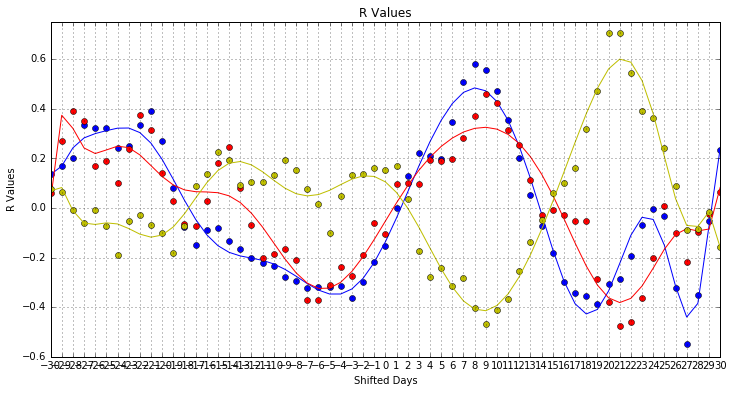

In [35]:
rValASlope = np.polyfit(rValsFinal[0], rValsFinal[1], 15)
rValCSlope = np.polyfit(rValsFinal[0], rValsFinal[2], 15)
rValDSlope = np.polyfit(rValsFinal[0], rValsFinal[3], 15)
lineRA = np.polyval(rValASlope, rValsFinal[0])
lineRC = np.polyval(rValCSlope, rValsFinal[0])
lineRD = np.polyval(rValDSlope, rValsFinal[0])

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(-30, 30)
plt.xlabel("Shifted Days")
plt.ylabel("R Values")
plt.ylim(-0.6, 0.75)
plt.xticks(np.arange(-30, 31, 1))
plt.title("R Values")


plt.plot(rValsFinal[0], rValsFinal[1], "bo") #blue
plt.plot(rValsFinal[0], lineRA, "b")

plt.plot(rValsFinal[0], rValsFinal[2], "ro") #red
plt.plot(rValsFinal[0], lineRC, "r")

plt.plot(rValsFinal[0], rValsFinal[3], "yo") #yellow
plt.plot(rValsFinal[0], lineRD, "y")

bestShiftBA = rValsFinal[0][np.argmax(rValsFinal[1])] * averageDay
print("Shift Giving Maximum Value of BA Curve: %f" %bestShiftBA)

bestShiftBC = rValsFinal[0][np.argmax(rValsFinal[2])] * averageDay
print("Shift Giving Maximum Value of BC Curve: %f" %bestShiftBC)

bestShiftBD = rValsFinal[0][np.argmax(rValsFinal[3])] * averageDay
print("Shift Giving Maximum Value of BD Curve: %f" %bestShiftBD)

In [36]:
length = len(day)
lastDay = day[length - 1]
firstDay = day[0]
averageDay = (lastDay - firstDay)/length

avgDays2 = np.array([arrDays, np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays))])

indexNewDay = 0
while(indexNewDay < len(avgDays2[0])): #loop through first row of data table with average days
    currentNewDay = avgDays2[0][indexNewDay] #averageday
    before = currentNewDay - 1.5*averageDay
    after = currentNewDay + 1.5*averageDay
    total1 = 0.0
    total2 = 0.0
    total3 = 0.0
    total4 = 0.0
    counter = 0.0
    indexOrigDay = 0
    while(indexOrigDay < len(day)): #loop through original days
        currentOrigDay = day[indexOrigDay]
        if(currentOrigDay >= before and currentOrigDay <= after): #loop through the original days, look for the days that are between before and after
            total1 += flaNormOver[indexOrigDay]
            total2 += flbNormOver[indexOrigDay]
            total3 += flcNormOver[indexOrigDay]
            total4 += fldNormOver[indexOrigDay]
            counter += 1
        indexOrigDay += 1
    average1 = total1/counter
    average2 = total2/counter
    average3 = total3/counter
    average4 = total4/counter
    avgDays2[1][indexNewDay] = average1
    avgDays2[2][indexNewDay] = average2
    avgDays2[3][indexNewDay] = average3
    avgDays2[4][indexNewDay] = average4
    indexNewDay += 1

In [38]:
length = 61.0 #total number of days
lastIndex = length - 1 #index of last day
rValues2 = np.array([np.arange(length), np.arange(length), np.arange(length), np.arange(length), np.arange(length)]) #holds all r values
graphNumber = 1
while(graphNumber <= 4):
    indexCounter = 0 #tracks index of nSteps/rValues
    isPositive = False
    shiftCounter = 30 #tracks amount of shift
    while(shiftCounter <= 30):
        if(shiftCounter == 0):
            r = calc_r(avgDays2[2], avgDays2[graphNumber], 0, lastIndex, 0, lastIndex)
            rValues2[0][indexCounter] = 0
            rValues2[graphNumber][indexCounter] = r
            isPositive = True
            shiftCounter += 1
        elif(not(isPositive)):
            r = calc_r(avgDays2[2], avgDays2[graphNumber], shiftCounter, lastIndex, 0, lastIndex - shiftCounter)
            temp = shiftCounter * -1
            rValues2[0][indexCounter] = temp
            rValues2[graphNumber][indexCounter] = r
            shiftCounter -= 1
        elif(isPositive):
            r = calc_r(avgDays2[2], avgDays2[graphNumber], 0, lastIndex - shiftCounter, shiftCounter, lastIndex)
            rValues2[0][indexCounter] = shiftCounter
            rValues2[graphNumber][indexCounter] = r
            shiftCounter += 1
        indexCounter += 1
    if(graphNumber == 1):
        graphNumber += 2
    else:
        graphNumber += 1
rValsFinal2 = np.delete(rValues2, 2, 0)
print(rValsFinal2)

[[ -3.00000000e+01  -2.90000000e+01  -2.80000000e+01  -2.70000000e+01
   -2.60000000e+01  -2.50000000e+01  -2.40000000e+01  -2.30000000e+01
   -2.20000000e+01  -2.10000000e+01  -2.00000000e+01  -1.90000000e+01
   -1.80000000e+01  -1.70000000e+01  -1.60000000e+01  -1.50000000e+01
   -1.40000000e+01  -1.30000000e+01  -1.20000000e+01  -1.10000000e+01
   -1.00000000e+01  -9.00000000e+00  -8.00000000e+00  -7.00000000e+00
   -6.00000000e+00  -5.00000000e+00  -4.00000000e+00  -3.00000000e+00
   -2.00000000e+00  -1.00000000e+00   0.00000000e+00   1.00000000e+00
    2.00000000e+00   3.00000000e+00   4.00000000e+00   5.00000000e+00
    6.00000000e+00   7.00000000e+00   8.00000000e+00   9.00000000e+00
    1.00000000e+01   1.10000000e+01   1.20000000e+01   1.30000000e+01
    1.40000000e+01   1.50000000e+01   1.60000000e+01   1.70000000e+01
    1.80000000e+01   1.90000000e+01   2.00000000e+01   2.10000000e+01
    2.20000000e+01   2.30000000e+01   2.40000000e+01   2.50000000e+01
    2.60000000e+01  

Shift Giving Maximum Value of BA Curve: 28.440000
Shift Giving Maximum Value of BC Curve: 31.995000
Shift Giving Maximum Value of BD Curve: 74.655000


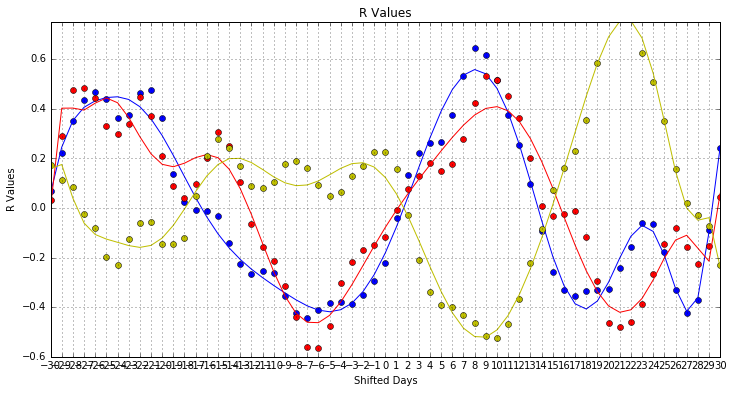

In [39]:
rValASlope2 = np.polyfit(rValsFinal2[0], rValsFinal2[1], 15)
rValCSlope2 = np.polyfit(rValsFinal2[0], rValsFinal2[2], 15)
rValDSlope2 = np.polyfit(rValsFinal2[0], rValsFinal2[3], 15)
lineRA2 = np.polyval(rValASlope2, rValsFinal2[0])
lineRC2 = np.polyval(rValCSlope2, rValsFinal2[0])
lineRD2 = np.polyval(rValDSlope2, rValsFinal2[0])

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(-30, 30)
plt.xlabel("Shifted Days")
plt.ylabel("R Values")
plt.ylim(-0.6, 0.75)
plt.xticks(np.arange(-30, 31, 1))
plt.title("R Values")


plt.plot(rValsFinal2[0], rValsFinal2[1], "bo") #blue
plt.plot(rValsFinal2[0], lineRA2, "b")

plt.plot(rValsFinal2[0], rValsFinal2[2], "ro") #red
plt.plot(rValsFinal2[0], lineRC2, "r")

plt.plot(rValsFinal2[0], rValsFinal2[3], "yo") #yellow
plt.plot(rValsFinal2[0], lineRD2, "y")

bestShiftBA2 = rValsFinal2[0][np.argmax(rValsFinal2[1])] * averageDay
print("Shift Giving Maximum Value of BA Curve: %f" %bestShiftBA2)

bestShiftBC2 = rValsFinal2[0][np.argmax(rValsFinal2[2])] * averageDay
print("Shift Giving Maximum Value of BC Curve: %f" %bestShiftBC2)

bestShiftBD2 = rValsFinal2[0][np.argmax(rValsFinal2[3])] * averageDay
print("Shift Giving Maximum Value of BD Curve: %f" %bestShiftBD2)

In [40]:
length = len(day)
lastDay = day[length - 1]
firstDay = day[0]
averageDay = (lastDay - firstDay)/length

avgDays3 = np.array([arrDays, np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays)), np.arange(len(arrDays))])

indexNewDay = 0
while(indexNewDay < len(avgDays3[0])): #loop through first row of data table with average days
    currentNewDay = avgDays3[0][indexNewDay] #averageday
    before = currentNewDay - 2*averageDay
    after = currentNewDay + 2*averageDay
    total1 = 0.0
    total2 = 0.0
    total3 = 0.0
    total4 = 0.0
    counter = 0.0
    indexOrigDay = 0
    while(indexOrigDay < len(day)): #loop through original days
        currentOrigDay = day[indexOrigDay]
        if(currentOrigDay >= before and currentOrigDay <= after): #loop through the original days, look for the days that are between before and after
            total1 += flaNormOver[indexOrigDay]
            total2 += flbNormOver[indexOrigDay]
            total3 += flcNormOver[indexOrigDay]
            total4 += fldNormOver[indexOrigDay]
            counter += 1
        indexOrigDay += 1
    average1 = total1/counter
    average2 = total2/counter
    average3 = total3/counter
    average4 = total4/counter
    avgDays3[1][indexNewDay] = average1
    avgDays3[2][indexNewDay] = average2
    avgDays3[3][indexNewDay] = average3
    avgDays3[4][indexNewDay] = average4
    indexNewDay += 1

In [42]:
length = 61.0 #total number of days
lastIndex = length - 1 #index of last day
rValues3 = np.array([np.arange(length), np.arange(length), np.arange(length), np.arange(length), np.arange(length)]) #holds all r values
graphNumber = 1
while(graphNumber <= 4):
    indexCounter = 0 #tracks index of nSteps/rValues
    isPositive = False
    shiftCounter = 30 #tracks amount of shift
    while(shiftCounter <= 30):
        if(shiftCounter == 0):
            r = calc_r(avgDays3[2], avgDays3[graphNumber], 0, lastIndex, 0, lastIndex)
            rValues3[0][indexCounter] = 0
            rValues3[graphNumber][indexCounter] = r
            isPositive = True
            shiftCounter += 1
        elif(not(isPositive)):
            r = calc_r(avgDays3[2], avgDays3[graphNumber], shiftCounter, lastIndex, 0, lastIndex - shiftCounter)
            temp = shiftCounter * -1
            rValues3[0][indexCounter] = temp
            rValues3[graphNumber][indexCounter] = r
            shiftCounter -= 1
        elif(isPositive):
            r = calc_r(avgDays3[2], avgDays3[graphNumber], 0, lastIndex - shiftCounter, shiftCounter, lastIndex)
            rValues3[0][indexCounter] = shiftCounter
            rValues3[graphNumber][indexCounter] = r
            shiftCounter += 1
        indexCounter += 1
    if(graphNumber == 1):
        graphNumber += 2
    else:
        graphNumber += 1
rValsFinal3 = np.delete(rValues3, 2, 0)
print(rValsFinal3)

[[ -3.00000000e+01  -2.90000000e+01  -2.80000000e+01  -2.70000000e+01
   -2.60000000e+01  -2.50000000e+01  -2.40000000e+01  -2.30000000e+01
   -2.20000000e+01  -2.10000000e+01  -2.00000000e+01  -1.90000000e+01
   -1.80000000e+01  -1.70000000e+01  -1.60000000e+01  -1.50000000e+01
   -1.40000000e+01  -1.30000000e+01  -1.20000000e+01  -1.10000000e+01
   -1.00000000e+01  -9.00000000e+00  -8.00000000e+00  -7.00000000e+00
   -6.00000000e+00  -5.00000000e+00  -4.00000000e+00  -3.00000000e+00
   -2.00000000e+00  -1.00000000e+00   0.00000000e+00   1.00000000e+00
    2.00000000e+00   3.00000000e+00   4.00000000e+00   5.00000000e+00
    6.00000000e+00   7.00000000e+00   8.00000000e+00   9.00000000e+00
    1.00000000e+01   1.10000000e+01   1.20000000e+01   1.30000000e+01
    1.40000000e+01   1.50000000e+01   1.60000000e+01   1.70000000e+01
    1.80000000e+01   1.90000000e+01   2.00000000e+01   2.10000000e+01
    2.20000000e+01   2.30000000e+01   2.40000000e+01   2.50000000e+01
    2.60000000e+01  

Shift Giving Maximum Value of BA Curve: 31.995000
Shift Giving Maximum Value of BC Curve: 35.550000
Shift Giving Maximum Value of BD Curve: 74.655000


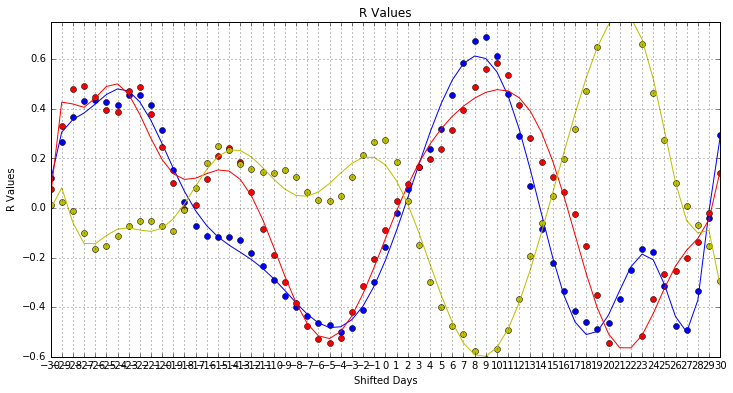

In [43]:
rValASlope3 = np.polyfit(rValsFinal3[0], rValsFinal3[1], 15)
rValCSlope3 = np.polyfit(rValsFinal3[0], rValsFinal3[2], 15)
rValDSlope3 = np.polyfit(rValsFinal3[0], rValsFinal3[3], 15)
lineRA3 = np.polyval(rValASlope3, rValsFinal3[0])
lineRC3 = np.polyval(rValCSlope3, rValsFinal3[0])
lineRD3 = np.polyval(rValDSlope3, rValsFinal3[0])

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(-30, 30)
plt.xlabel("Shifted Days")
plt.ylabel("R Values")
plt.ylim(-0.6, 0.75)
plt.xticks(np.arange(-30, 31, 1))
plt.title("R Values")


plt.plot(rValsFinal3[0], rValsFinal3[1], "bo") #blue
plt.plot(rValsFinal3[0], lineRA3, "b")

plt.plot(rValsFinal3[0], rValsFinal3[2], "ro") #red
plt.plot(rValsFinal3[0], lineRC3, "r")

plt.plot(rValsFinal3[0], rValsFinal3[3], "yo") #yellow
plt.plot(rValsFinal3[0], lineRD3, "y")

bestShiftBA3 = rValsFinal3[0][np.argmax(rValsFinal3[1])] * averageDay
print("Shift Giving Maximum Value of BA Curve: %f" %bestShiftBA3)

bestShiftBC3 = rValsFinal3[0][np.argmax(rValsFinal3[2])] * averageDay
print("Shift Giving Maximum Value of BC Curve: %f" %bestShiftBC3)

bestShiftBD3 = rValsFinal3[0][np.argmax(rValsFinal3[3])] * averageDay
print("Shift Giving Maximum Value of BD Curve: %f" %bestShiftBD3)

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<Container object of 3 artists>

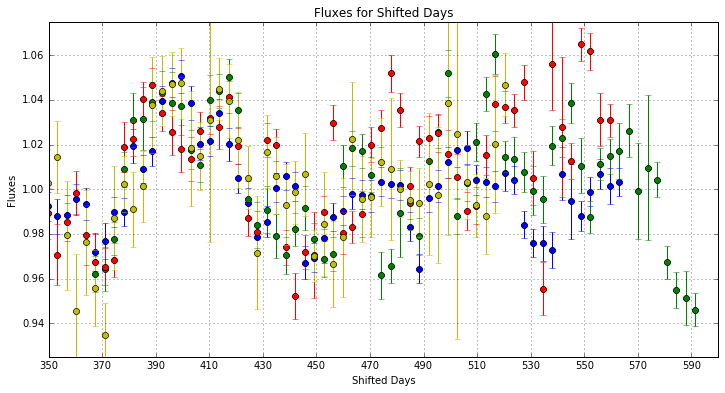

In [44]:
avgDaysA = avgDays[0] - 28.44
avgDaysB = avgDays[0]
avgDaysC = avgDays[0] - 31.995
avgDaysD = avgDays[0] - 71.1

slopeaOver = np.polyfit(avgDaysA, avgDays[1], 15)
slopebOver = np.polyfit(avgDaysB, avgDays[2], 15)
slopecOver = np.polyfit(avgDaysC, avgDays[3], 15)
slopedOver = np.polyfit(avgDaysD, avgDays[4], 15)
lineaOver = np.polyval(slopeaOver, avgDaysA)
linebOver = np.polyval(slopebOver, avgDaysB)
linecOver = np.polyval(slopecOver, avgDaysC)
linedOver = np.polyval(slopedOver, avgDaysD)

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(350, 600)
plt.xlabel("Shifted Days")
plt.ylabel("Fluxes")
plt.ylim([0.925, 1.075])
plt.xticks(np.arange(350, 600, 20))
plt.title("Fluxes for Shifted Days")

plt.plot(avgDaysA, avgDays[1], "bo") #blue
plt.errorbar(avgDaysA, avgDays[1], yerr = np.array(cerraNorm), fmt = "bo")
#plt.plot(avgDaysA, lineaOver, "b")

plt.plot(avgDaysB, avgDays[2], "go") #green
plt.errorbar(avgDaysB, avgDays[2], yerr = np.array(cerrbNorm), fmt = "go")
#plt.plot(avgDaysB, linebOver, "g")

plt.plot(avgDaysC, avgDays[3], "ro") #red
plt.errorbar(avgDaysC, avgDays[3], yerr = np.array(cerrcNorm), fmt = "ro")
#plt.plot(avgDaysC, linecOver, "r")

plt.plot(avgDaysD, avgDays[4], "yo") #yellow
plt.errorbar(avgDaysD, avgDays[4], yerr = np.array(cerrdNorm), fmt = "yo")
#plt.plot(avgDaysD, linedOver, "y")

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<Container object of 3 artists>

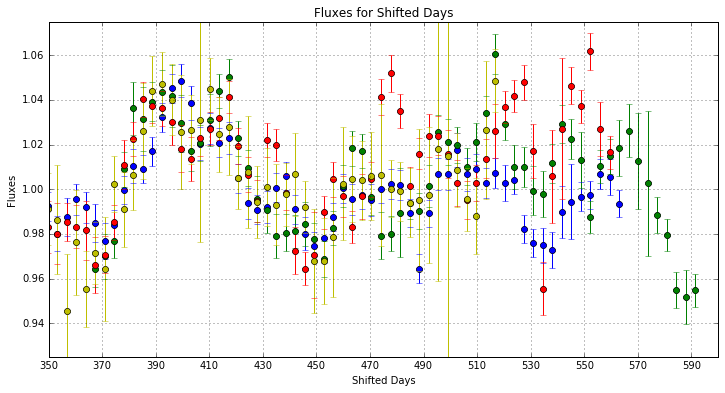

In [45]:
avgDaysA2 = avgDays2[0] - 28.44
avgDaysB2 = avgDays2[0]
avgDaysC2 = avgDays2[0] - 31.995
avgDaysD2 = avgDays2[0] - 74.655

slopeaOver2 = np.polyfit(avgDaysA2, avgDays2[1], 15)
slopebOver2 = np.polyfit(avgDaysB2, avgDays2[2], 15)
slopecOver2 = np.polyfit(avgDaysC2, avgDays2[3], 15)
slopedOver2 = np.polyfit(avgDaysD2, avgDays2[4], 15)
lineaOver2 = np.polyval(slopeaOver2, avgDaysA2)
linebOver2 = np.polyval(slopebOver2, avgDaysB2)
linecOver2 = np.polyval(slopecOver2, avgDaysC2)
linedOver2 = np.polyval(slopedOver2, avgDaysD2)

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(350, 600)
plt.xlabel("Shifted Days")
plt.ylabel("Fluxes")
plt.ylim([0.925, 1.075])
plt.xticks(np.arange(350, 600, 20))
plt.title("Fluxes for Shifted Days")

plt.plot(avgDaysA2, avgDays2[1], "bo") #blue
plt.errorbar(avgDaysA2, avgDays2[1], yerr = np.array(cerraNorm), fmt = "bo")
#plt.plot(avgDaysA2, lineaOver2, "b")

plt.plot(avgDaysB2, avgDays2[2], "go") #green
plt.errorbar(avgDaysB2, avgDays2[2], yerr = np.array(cerrbNorm), fmt = "go")
#plt.plot(avgDaysB2, linebOver2, "g")

plt.plot(avgDaysC2, avgDays2[3], "ro") #red
plt.errorbar(avgDaysC2, avgDays2[3], yerr = np.array(cerrcNorm), fmt = "ro")
#plt.plot(avgDaysC2, linecOver2, "r")

plt.plot(avgDaysD2, avgDays2[4], "yo") #yellow
plt.errorbar(avgDaysD2, avgDays2[4], yerr = np.array(cerrdNorm), fmt = "yo")
#plt.plot(avgDaysD2, linedOver2, "y")

/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/cosmos/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<Container object of 3 artists>

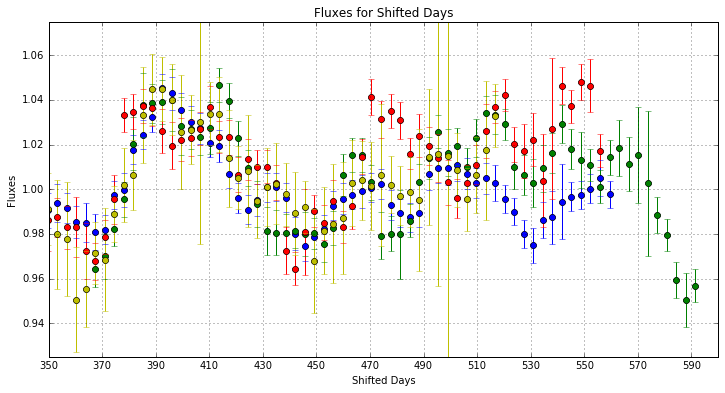

In [46]:
avgDaysA3 = avgDays3[0] - 31.995
avgDaysB3 = avgDays3[0]
avgDaysC3 = avgDays3[0] - 35.55
avgDaysD3 = avgDays3[0] - 74.655

slopeaOver3 = np.polyfit(avgDaysA3, avgDays3[1], 15)
slopebOver3 = np.polyfit(avgDaysB3, avgDays3[2], 15)
slopecOver3 = np.polyfit(avgDaysC3, avgDays3[3], 15)
slopedOver2 = np.polyfit(avgDaysD3, avgDays3[4], 15)
lineaOver3 = np.polyval(slopeaOver3, avgDaysA3)
linebOver3 = np.polyval(slopebOver3, avgDaysB3)
linecOver3 = np.polyval(slopecOver3, avgDaysC3)
linedOver3 = np.polyval(slopedOver3, avgDaysD3)

plt.figure(figsize = (12, 6))
plt.grid()
plt.xlim(350, 600)
plt.xlabel("Shifted Days")
plt.ylabel("Fluxes")
plt.ylim([0.925, 1.075])
plt.xticks(np.arange(350, 600, 20))
plt.title("Fluxes for Shifted Days")

plt.plot(avgDaysA3, avgDays3[1], "bo") #blue
plt.errorbar(avgDaysA3, avgDays3[1], yerr = np.array(cerraNorm), fmt = "bo")
#plt.plot(avgDaysA3, lineaOver3, "b")

plt.plot(avgDaysB3, avgDays3[2], "go") #green
plt.errorbar(avgDaysB3, avgDays3[2], yerr = np.array(cerrbNorm), fmt = "go")
#plt.plot(avgDaysB3, linebOver3, "g")

plt.plot(avgDaysC3, avgDays3[3], "ro") #red
plt.errorbar(avgDaysC3, avgDays3[3], yerr = np.array(cerrcNorm), fmt = "ro")
#plt.plot(avgDaysC3, linecOver3, "r")

plt.plot(avgDaysD3, avgDays3[4], "yo") #yellow
plt.errorbar(avgDaysD3, avgDays3[4], yerr = np.array(cerrdNorm), fmt = "yo")
#plt.plot(avgDaysD3, linedOver3, "y")

In [66]:
ra0 = 242.30863
dec0 = 65.540738

raVals = np.array([242.30813, 242.30865, 242.30738, 242.30779, 242.30833]) #A, C, D, G1, G2
decVals = np.array([65.541278, 65.54115, 65.54093, 65.540982, 65.541009])

dec0Radians = dec0*pi/180.

deltaRA = ((raVals - ra0) * math.cos(dec0Radians)) * 3600.0 #find offsaet of RA values, convert to seconds
deltaDec = (decVals - dec0) * 3600.0

print(deltaRA)
print(deltaDec)

[-0.74528306  0.02981132 -1.86320765 -1.25207554 -0.44716984]
[ 1.944   1.4832  0.6912  0.8784  0.9756]


In [48]:
tObserved1 = [28.44, 31.995, 71.1]
tObserved2 = [28.44, 31.995, 74.655]
tObserved3 = [31.995, 35.55, 74.655]
tModel = np.array([19.5275, 22.8763, 79.4780])
h1 = tModel/tObserved1
h2 = tModel/tObserved2
h3 = tModel/tObserved3

In [49]:
H1 = h1*100
H2 = h2*100
H3 = h3*100

In [50]:
print(H1)
print(H2)
print(H3)

[  68.66209564   71.49960931  111.78340366]
[  68.66209564   71.49960931  106.46038444]
[  61.0329739    64.34964838  106.46038444]


In [64]:
tModel2 = np.array([22.7, 26.0, 55.4])
H12 = tModel2/tObserved1 * 100
H22 = tModel2/tObserved2 * 100
H32 = tModel2/tObserved3 * 100

print(H12)
print(H22)
print(H32)

[ 79.81715893  81.2626973   77.91842475]
[ 79.81715893  81.2626973   74.20802358]
[ 70.94858572  73.13642757  74.20802358]


In [71]:
#conversion back from arcseconds to degrees
#centerRA = -1.464986/math.cos(dec0) + ra0
#centerDec = 1.000966/3600. + dec0
#calculated arcseconds per pixel in ds9, calculated offset of center galaxies in arcseconds, changed into to offset
#in pixels, found that centers match well
centerRA = -1.464986/0.0499964
centerDec = 1.000966/0.0499964
centerRA2 = -3.577249e-01/0.0499
centerDec2 = 9.915428e-01/0.0499
print(centerRA)
print(centerDec)
print(centerRA2)
print(centerDec2)

-29.3018297317
20.0207614948
-7.16883567134
19.8705971944


In [69]:
print(-3.577249e-01/math.cos(dec0) + ra0)
print(9.915428e-01/3600. + dec0)

242.702672346
65.5410134286
